<a href="https://colab.research.google.com/github/Nikiloshen/Simple-Neural-Network-Projects/blob/main/simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class Model(nn.Module):
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [ ]:
torch.manual_seed(41)
model = Model()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [ ]:
# Change last column from strings to integers
my_df['species'] = my_df['species'].replace({'setosa': 0.0, 'versicolor': 1.0, 'virginica': 2.0})
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
# Train test split! Set X, y
X = my_df.drop('species', axis=1)
y = my_df['species']

In [ ]:
# Convert these to numpy arrays
X = X.values
y = y.values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Convert X features to Float Tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [ ]:
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
# Set the criterion of model to measure the error
criterion = nn.CrossEntropyLoss()
# Adam Optimizer, lr = learning error(if error doesn't go down after a bunch of iterations(epochs), lower the learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
# Train our model!
# Epochs? (One run thru all the training data in our network)
epochs = 100
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # Predicted values vs the y_train

  # Keep track of out losses
  losses.append(loss.detach().numpy())

  # Print every 10 epochs
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation: take the error rate of forward propagation and feed it back
  # thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.125285267829895
Epoch: 10 and loss: 1.0188318490982056
Epoch: 20 and loss: 0.8338496685028076
Epoch: 30 and loss: 0.6025498509407043
Epoch: 40 and loss: 0.41379639506340027
Epoch: 50 and loss: 0.28254783153533936
Epoch: 60 and loss: 0.19306634366512299
Epoch: 70 and loss: 0.13670381903648376
Epoch: 80 and loss: 0.10248851776123047
Epoch: 90 and loss: 0.08341800421476364


Text(0.5, 0, 'Epochs')

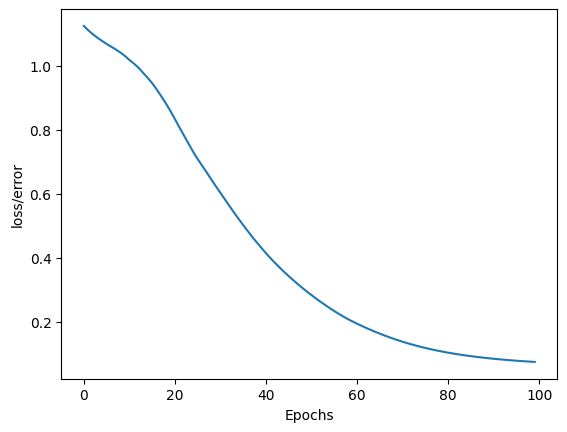

In [ ]:
# Graph it out
plt.plot(range(epochs), losses)
plt.ylabel('loss/error')
plt.xlabel('Epochs')

In [ ]:
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad():
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test) # Find the loss/error


In [ ]:
loss

tensor(0.0659)

In [ ]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    # Will tell us what type of flower class our network thinks it is
    print(f'{i+1}, {y_val} \t {y_test[i]}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f'We got {correct} correct!')

1, tensor([-4.1795,  5.2838,  2.3345]) 	 1
2, tensor([ 4.7665, -2.3949, -2.9980]) 	 0
3, tensor([-10.1948,   3.9714,  13.7997]) 	 2
4, tensor([-4.4656,  5.1942,  2.8970]) 	 1
5, tensor([-4.7588,  5.7623,  2.7327]) 	 1
6, tensor([ 4.3316, -1.9997, -2.8022]) 	 0
7, tensor([-2.5971,  4.4958,  0.6615]) 	 1
8, tensor([-6.9635,  5.0945,  7.1304]) 	 2
9, tensor([-5.2100,  4.9461,  4.3900]) 	 1
10, tensor([-3.1201,  4.9901,  0.9299]) 	 1
11, tensor([-6.1828,  4.9779,  5.9907]) 	 2
12, tensor([ 4.5328, -2.2278, -2.8559]) 	 0
13, tensor([ 5.1847, -2.7950, -3.1701]) 	 0
14, tensor([ 4.5219, -2.2133, -2.8548]) 	 0
15, tensor([ 4.8994, -2.5495, -3.0303]) 	 0
16, tensor([-4.5544,  5.5063,  2.6977]) 	 1
17, tensor([-7.9222,  4.0615,  9.9288]) 	 2
18, tensor([-3.1509,  5.0050,  0.9467]) 	 1
19, tensor([-4.1263,  4.9738,  2.5960]) 	 1
20, tensor([-7.8391,  4.0088,  9.8401]) 	 2
21, tensor([ 4.2179, -1.9384, -2.7168]) 	 0
22, tensor([-5.6526,  4.7697,  5.3514]) 	 2
23, tensor([ 4.0823, -1.7897, -2.6765]

In [ ]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [ ]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 4.6472, -2.3355, -2.9044])


In [ ]:
newer_iris = torch.tensor([5.9, 3.0, 5.1, 1.8])

In [ ]:
with torch.no_grad():
  print(model(newer_iris))

tensor([-5.9659,  4.3825,  6.3223])


In [ ]:
# Save our NN model
torch.save(model.state_dict(), 'easiest_NN_on_iris_dataset.pt')

In [ ]:
# Load The Saved Model
new_model = Model()
new_model.load_state_dict(torch.load('easiest_NN_on_iris_dataset.pt'))

<ipython-input-26-153177325220>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('easiest_NN_on_iris_dataset.pt'))


<All keys matched successfully>

In [ ]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)